# Probabilités conditionnelles

Avant de commencer, regardons une [animation sympa](http://setosa.io/conditional/) sur les probabilités conditionnelles.

### Exemple 1

Un joueur lance successivement deux dés non pipés. 

Le tableau suivant montre toutes les valeurs possibles de la somme en fonction de la valeur de chaque dé : 

|(d1 / d2) | 1  | 2 | 3 | 4 | 5 | 6 |
|----|----|---|---|---|---|---|
| **1**  | 2  | 3 | 4 | 5 | 6 | 7 |
| **2**  | 3  | 4 | 5 | 6 | 7 | 8 |
| **3**  | 4  | 5 | 6 | 7 | 8 | 9 |
| **4**  | 5  | 6 | 7 | 8 | 9 | 10 |
| **5**  | 6  | 7 | 8 | 9 | 10 | 11 |
| **6**  | 7  | 8 | 9 | 10 | 11 | 12 |
 
Considérons maintenant l'événement *A* : "la somme des dés est supérieure ou égale à 10". Le tableau suivant permet de voir que $\mathbb{P}(A) = 1/6$. Expliquez comment retrouver ce résultat.


|(d1 / d2) | 1  | 2 | 3 | 4 | 5 | 6 |
|----|----|---|---|---|---|---|
| **1**  | 2  | 3 | 4 | 5 | 6 | 7 |
| **2**  | 3  | 4 | 5 | 6 | 7 | 8 |
| **3**  | 4  | 5 | 6 | 7 | 8 | 9 |
| **4**  | 5  | 6 | 7 | 8 | 9 | <p style="color:red"> 10 </p>| 
| **5**  | 6  | 7 | 8 | 9 | <p style="color:red">10</p> | <p style="color:red">11</p> |
| **6**  | 7  | 8 | 9 | <p style="color:red">10</p> | <p style="color:red">11</p> | <p style="color:red">12</p> |

On peut simuler cette expérience en utilisant la function *rollDie*.

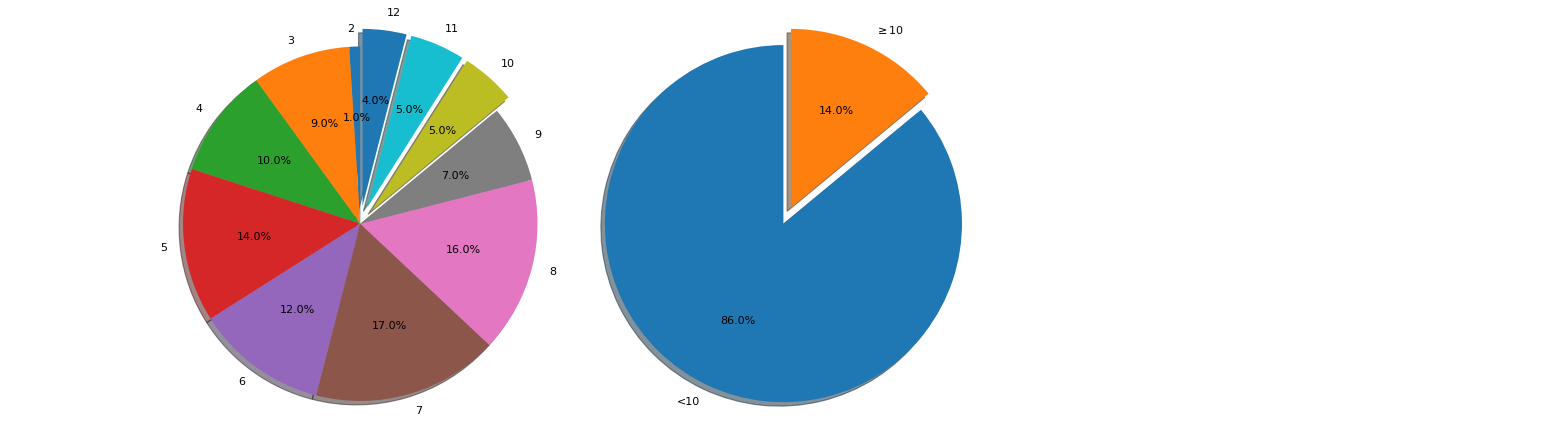

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from functions import roll_die

%matplotlib inline

def lance2des(n):
    """
    Lancer deux dés non pipés n fois 
    """
    d1, d2 = roll_die(n), roll_die(n)
    return(d1, d2)

d1, d2 = lance2des(100)

d1_plus_d2 = [i+j for i, j in zip(d1, d2)]
values = list(set(d1_plus_d2))
values.sort()
frequencies = [d1_plus_d2.count(i) for i in values]
lower_than10 = sum(frequencies[:-3])
greater_than10 = sum(frequencies[-3:])
labels = ["<10", r"$\geq 10$"]


# Doing the plot
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0.1, 0.1) 
fig = plt.figure(figsize=(25, 15), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(211)
ax1.pie(frequencies, explode=explode, labels=values, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

explode = (0, 0.1) 
ax2.pie([lower_than10, greater_than10], explode=explode, labels=labels, autopct='%1.1f%%', 
        shadow=True, startangle=90)
ax2.axis('equal')

plt.show()
#plt.pie(frequency, labels=values)

Considérons maintenant l'événement $C$ : "on a obtenu $4$ avec le dé numéro $1$". Quelle serait maintenant la probabilité que la somme des dés soit supérieure ou égale à 10 ?


|(d1 / d2) | 1  | 2 | 3 | 4 | 5 | 6 |
|----|----|---|---|---|---|---|
| **1**  | 2  | 3 | 4 | 5 | 6 | 7 |
| **2**  | 3  | 4 | 5 | 6 | 7 | 8 |
| **3**  | 4  | 5 | 6 | 7 | 8 | 9 |
| **4**  | <p style="color:blue"> 5 </p> | <p style="color:blue"> 6 </p> | <p style="color:blue"> 7 </p> | <p style="color:blue"> 8 </p> | <p style="color:blue"> 9 </p> | <p style="color:green"> 10 </p>| 
| **5**  | 6  | 7 | 8 | 9 | <p style="color:red">10</p> | <p style="color:red">11</p> |
| **6**  | 7  | 8 | 9 | <p style="color:red">10</p> | <p style="color:red">11</p> | <p style="color:red">12</p> |

À l'aide du tableau, on peut voir que la probabilité que la somme des points soit supérieur ou égale à $10$, étant doné qu'on a eu $4$ avec le dé numéro $1$ équivaut à compter le nombre de valeurs supérieures ou égales à $10$ qui se trouvent dans la ligne $4$ du tableau. Expliquez comment caculer cette probabilité.



### À vous de jouer

1. Vérifier à l'aide de la fonction *lance2des* que $\mathbb{P}(A|C)$ vaut $\frac{1}{6}$

In [28]:
d1, d2 = lance2des(1000000)

somme = 0
div = 0
for i in range(len(d1)):
    if d1[i]==4:
        div += 1
        if d1[i]+d2[i] >= 10:
            somme +=1
            
print(somme/div)
        


0.16509419851986576


## Formule des probabilités totales

Nous allons voir un exemple du poly du cours de Probabilités et Statistiques (Exemple 2.12 page 20). 

*On prend $100$ dés dont 25 sont pipés. Pour ces derniers la probabilité d'obtenir un $6$ vaut $\frac{1}{2}$. On choisit un dé au hassard et on le lance. Calculer la probabilité d'obtenir un 6.*

À l'aide de la formule des probabilités totales on a :

$$\mathbb{P}(6) = \mathbb{P}(6\ |"dé\ choisi\ est\ non\ pipé")\mathbb{P}("choisir\ un\ dé\ non\ pipé") + \mathbb{P}(6\ |"dé\ choisi\ est\ pipé")\mathbb{P}("choisir\ un\ dé\ pipé")$$
$$\mathbb{P}(6) = \frac{1}{6}\times\frac{75}{100} + \frac{1}{2}\times\frac{25}{100}=\frac{1}{4}$$

**À l'aide des simulations, vérifiez ce resultat.**



In [12]:
des1, des2 = lance2des(10)

In [13]:
print("des1= ",des1)
print("des2= ",des2)

des1=  [2, 4, 2, 5, 3, 6, 6, 1, 5, 3]
des2=  [1, 1, 1, 1, 2, 6, 1, 3, 4, 2]


In [37]:
def rollDie() :
    # On simule un lancé d'un dé non truqué
    values = []
    s = random.random()
    if s < 1./6:
        values.append(1)
    elif s < 2./6:
        values.append(2)
    elif s < 3./6:
        values.append(3)
    elif s < 4./6:
        values.append(4)
    elif s < 5./6:
        values.append(5)
    else:
        values.append(6)
    return(values)

In [38]:
def rollDiePipe() :
    # On simule un lancé d'un dé truqué
    values = []
    s = random.random()
    if s < 1./10:
        values.append(1)
    elif s < 2./10:
        values.append(2)
    elif s < 3./10:
        values.append(3)
    elif s < 4./10:
        values.append(4)
    elif s < 5./10:
        values.append(5)
    else:
        values.append(6)
    return(values)

In [53]:
import random, bisect
n = 100000
p6 = 0
Liste=[]
for i in range(n):
    s = random.random()
    if s < 0.25:
        Liste += rollDiePipe()
    else :
        Liste += rollDie()

Comp = 0
        
for i in range(len(Liste)) :
    if Liste[i]==6 :
        Comp += 1

print(Comp/n)

0.25133


In [69]:
def simulateRV(probVect, n):
    # Simule une variable aleatoire à partir d'un vecteur de proba
    values = []
    if (min(probVect) < 0.0) or not np.isclose(sum(probVect), 1):
        print("No valid probability vector")
        return([])
    p = [probVect[0]]
    for i in range(1, len(probVect)):
        p.append(p[-1] + probVect[i])
    for i in range(n):
        s = random.random()
        values.append(bisect.bisect(p, s))
    return(values)


n = 100
d = []

for i in range(n):
    s = random.random()
    if s < 0.25:
        d += simulateRV(probVect=[1/10, 1/10, 1/10, 1/10, 1/10, 5/10], n=1)
    else:
        d += simulateRV(probVect=[1/6, 1/6, 1/6, 1/6, 1/6, 1/6], n=1)

In [70]:
d1 = [i+1 for i in d]

In [71]:
d1.count(6)/len(d1)

0.23

In [47]:
for i, j in zip(des1, des2):
    print(i,j)

2 1
4 1
2 1
5 1
3 2
6 6
6 1
1 3
5 4
3 2


1.0